<a href="https://colab.research.google.com/github/amarmar01/AI-Masters-Portfolio/blob/main/Deep%20Learning/vegetable_classification_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"
---
**Autores:**
- Julia García Vega
- Jorge Pozo Zapatero
- Alonso Garrido Gómez
- Adrián Martínez Martín
---
## Índice
1. [Carga del Dataset](#carga)
2. [Inspección del Dataset](#inspeccion)
3. [Estrategia 1: Entrenamiento desde Cero](#scratch)
4. [Estrategia 2: Transfer Learning](#transfer)
5. [Comparación de Estrategias](#comparativa)
6. [Conclusiones Finales](#conclusiones)

## 1. <a name="carga">Carga del Dataset</a>
- Carga del dataset usando la API de Kaggle.

In [ ]:
# Instalaciones necesarias
!pip install --upgrade --force-reinstall --no-deps kaggle
!apt-get install tree

# Imports necesarios
from google.colab import files

# Para conectar el notebook con la cuenta de gdrive
from google.colab import drive
drive.mount('/content/drive/')

BASE_FOLDER = '/content/drive/My Drive/Colab Notebooks/'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.5
    Uninstalling kaggle-1.7.4.5:
      Successfully uninstalled kaggle-1.7.4.5
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (54.8 kB/s)
Selecting previously unselected package tree.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
Mounted at /content/drive/


In [ ]:
# Subimos el archivo kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juliagarve","key":"5649c5612324fd329c47d1502707613b"}'}

In [ ]:
# Configuramos el entorno para usar la API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Listamos datasets para comprobar conexión correcta
!kaggle datasets list | head

ref                                                          title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance         Student Habits vs Academic Performance                    19512  2025-04-12 10:49:08.663000          24127        412  1.0              
adilshamim8/cost-of-international-education                  Cost of International Education                           18950  2025-05-07 15:41:53.213000           5155         86  1.0              
adilshamim8/social-media-addiction-vs-relationships          Students' Social Media Addiction                           7851  2025-05-10 14:38:02.713000           2439         37  1.0              
ivankmk/th

In [ ]:
# Descargamos el dataset de nuestro grupo
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0
 96% 512M/534M [00:07<00:00, 73.7MB/s]
100% 534M/534M [00:07<00:00, 74.0MB/s]


In [ ]:
# Mostramos la estructura del directorio del dataset
!unzip -q vegetable-image-dataset.zip
!tree 'Vegetable Images' -L 2

Vegetable Images
├── test
│   ├── Bean
│   ├── Bitter_Gourd
│   ├── Bottle_Gourd
│   ├── Brinjal
│   ├── Broccoli
│   ├── Cabbage
│   ├── Capsicum
│   ├── Carrot
│   ├── Cauliflower
│   ├── Cucumber
│   ├── Papaya
│   ├── Potato
│   ├── Pumpkin
│   ├── Radish
│   └── Tomato
├── train
│   ├── Bean
│   ├── Bitter_Gourd
│   ├── Bottle_Gourd
│   ├── Brinjal
│   ├── Broccoli
│   ├── Cabbage
│   ├── Capsicum
│   ├── Carrot
│   ├── Cauliflower
│   ├── Cucumber
│   ├── Papaya
│   ├── Potato
│   ├── Pumpkin
│   ├── Radish
│   └── Tomato
└── validation
    ├── Bean
    ├── Bitter_Gourd
    ├── Bottle_Gourd
    ├── Brinjal
    ├── Broccoli
    ├── Cabbage
    ├── Capsicum
    ├── Carrot
    ├── Cauliflower
    ├── Cucumber
    ├── Papaya
    ├── Potato
    ├── Pumpkin
    ├── Radish
    └── Tomato

48 directories, 0 files


In [ ]:
# Mostramos solo algunas imágenes dentro de una clase concreta
!ls 'Vegetable Images/train/Potato' | head

0001.jpg
0002.jpg
0003.jpg
0004.jpg
0005.jpg
0006.jpg
0007.jpg
0008.jpg
0009.jpg
0010.jpg


## 2. <a name="inspeccion">Inspección del Dataset</a>
- Visualización de clases, distribución y ejemplos de imágenes.

In [ ]:
# Imports necesarios
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
# Constantes necesarias
BASE_DIR = 'Vegetable Images'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VAL_DIR = os.path.join(BASE_DIR, 'validation')
TEST_DIR = os.path.join(BASE_DIR, 'test')
CLASSES = sorted(os.listdir(TRAIN_DIR))
DATASETS = {
    "train": TRAIN_DIR,
    "validation": VAL_DIR,
    "test": TEST_DIR
}

In [ ]:
# Mostrar información básica de las clases
print(f"Número de clases: {len(CLASSES)}")
print("Clases:", CLASSES)

Número de clases: 15
Clases: ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


In [ ]:
# Contamos imágenes por clase
def count_images_per_class(directory):
    return {cls: len(os.listdir(os.path.join(directory, cls))) for cls in sorted(os.listdir(directory))}

counts = {}
for dataset_name, path in DATASETS.items():
    counts[dataset_name] = count_images_per_class(path)

count_df = pd.DataFrame(counts).fillna(0).astype(int)
count_df = count_df.sort_index()

print("\nCantidad de imágenes por clase y conjunto:")
display(count_df)

# Mostrar totales por conjunto
totals = count_df.sum()
print("\nTotales por conjunto:")
for dataset, total in totals.items():
    print(f"{dataset.capitalize()}: {total} imágenes")


Cantidad de imágenes por clase y conjunto:


train  validation  test
Bean           1000         200   200
Bitter_Gourd   1000         200   200
Bottle_Gourd   1000         200   200
Brinjal        1000         200   200
Broccoli       1000         200   200
Cabbage        1000         200   200
Capsicum       1000         200   200
Carrot         1000         200   200
Cauliflower    1000         200   200
Cucumber       1000         200   200
Papaya         1000         200   200
Potato         1000         200   200
Pumpkin        1000         200   200
Radish         1000         200   200
Tomato         1000         200   200


Totales por conjunto:
Train: 15000 imágenes
Validation: 3000 imágenes
Test: 3000 imágenes



Ejemplos de las distintas clases:


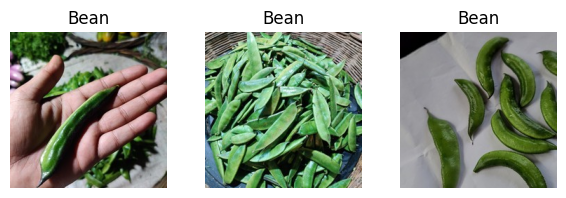

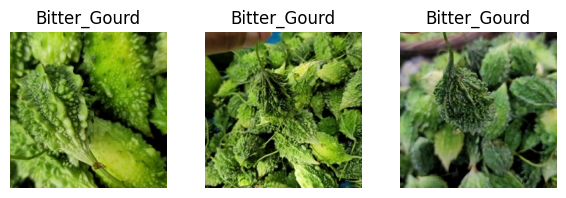

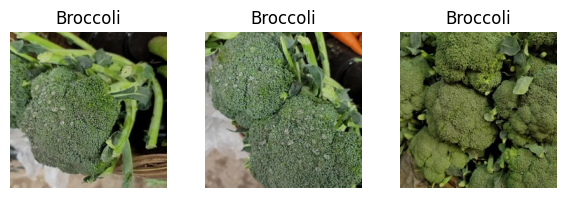

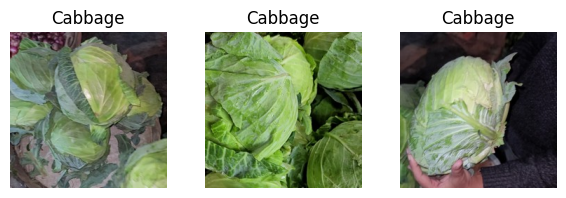

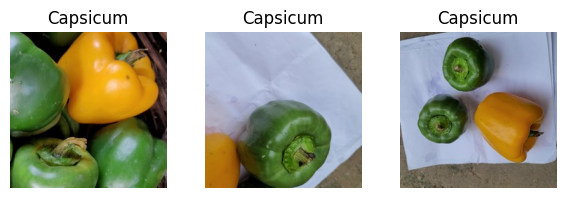

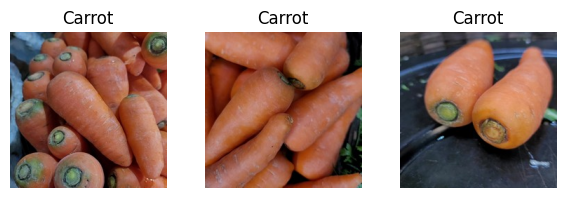

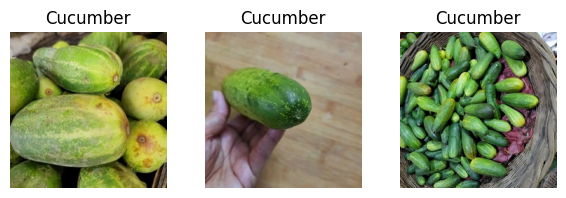

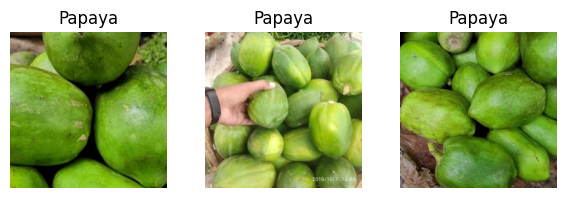

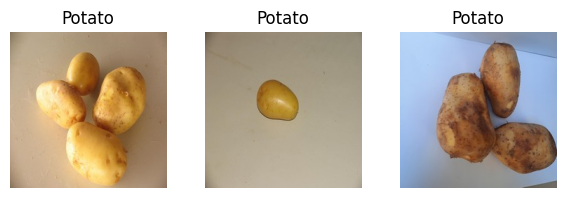

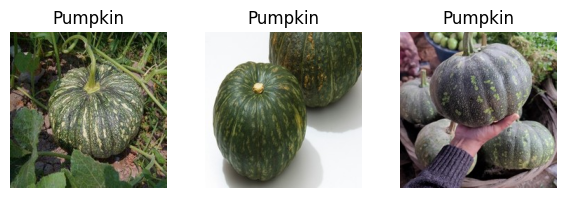

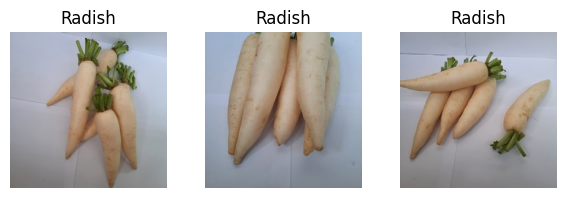

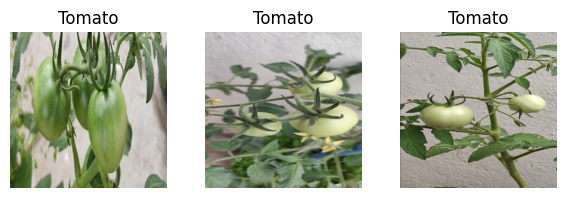

In [ ]:
# Mostrar imagenes de ejemplos para cada clase
def show_example_images(class_name, num=3):
    class_path = os.path.join(DATASETS['train'], class_name)
    images = os.listdir(class_path)
    selected = random.sample(images, num)

    plt.figure(figsize=(num * 2, 2))
    for i, img_name in enumerate(selected):
        img_path = os.path.join(class_path, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, num, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_name)
    plt.tight_layout()
    plt.show()

print("\nEjemplos de las distintas clases:")
for class_name in CLASSES:
    show_example_images(class_name)

## 3. <a name="scratch">Estrategia 1: Entrenamiento desde Cero</a>

### 3.1. Acondicionamiento y Preprocesamiento de los Datos

In [ ]:
import cv2

#Primero obtenemos las imágenes de training, test y validación del directorio.
def load_dataset_from_directory(directory, img_size = (64,64)): #Redimensionamos las imágenes para no quedarnos sin RAM. Luego se aplicará otra técnica que es directamente hacer un fLOW from directory, para modelos más complejos.
    x_data = []
    y_data = []
    label_names = sorted(os.listdir(directory))

    for label in label_names:
        for f in os.listdir(os.path.join(directory, label)):
            img = cv2.imread(os.path.join(directory, label, f))
            if img is not None:
                img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), img_size)
                x_data.append(img)
                y_data.append(label)
    return np.array(x_data), np.array(y_data)

# Carga de todos los datasets
X_train, y_train = load_dataset_from_directory(TRAIN_DIR)
X_train_val, y_train_val = load_dataset_from_directory(VAL_DIR)
X_test, y_test = load_dataset_from_directory(TEST_DIR)
print("x_train:", X_train.shape, "y_train:", y_train.shape)
print("x_val:", X_train_val.shape, "y_val:", y_train_val.shape)
print("x_test:", X_test.shape, "y_test:", y_test.shape)

x_train: (15000, 64, 64, 3) y_train: (15000,)
x_val: (3000, 64, 64, 3) y_val: (3000,)
x_test: (3000, 64, 64, 3) y_test: (3000,)


In [ ]:
# Normalizamos las imagenes entre [0,255]. Dividimos cuando sabemos que los datos de entrada están acotados entre esos 255 niveles de intensidad.
X_train_n = X_train.astype("float32") / 255.0
X_train_val_n = X_train_val.astype("float32") / 255.0
X_test_n  = X_test.astype("float32") / 255.0

#Binarizamos etiquetas. Pasamos a one-hot encoding
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import optimizers

#Instanciamos el método y lo aplicamos.
lb = LabelBinarizer()
y_train_ohe = lb.fit_transform(y_train)
y_train_val_ohe = lb.fit_transform(y_train_val)
y_test_ohe = lb.fit_transform(y_test)

print(y_train_val_ohe.shape)
print(y_train_val_ohe[:10, :])

(3000, 15)
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


### 3.2. Arquitectura de la Red
- Definición del modelo CNN desde cero.

En esta red CNN desde cero nos hemos basado en el modelo sequential de Keras. A través de una combinación de capas convolucionales y de pooling para obtener y condensar las características de las imágenes.

La red constará de 3 bloques convolucionales, cada uno compuesto por 2 capas convolucionales y un Maxpooling, y un bloque denso para ejercer la tarea de clasficación multiclase.

La idea de esta red es que sea eficiente pero ligera para poder realizar un entrenamiento rápido pero con buenos resultados.

In [ ]:
# Definir arquitectura CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Creamos el modelo secuencial
convnet = Sequential()

# Bloque 1
# Extrae características locales simples (bordes, formas)
convnet.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(64, 64, 3)))
convnet.add(layers.Conv2D(32, (3,3), padding = "same", activation = "relu")) # Esta capa recibe de entrada los 32 mapas de activación obtenidos de la capa previa.
convnet.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Reduce dimensiones y evita overfitting

# Bloque 2
# Detecta combinaciones de características más complejas
convnet.add(layers.Conv2D(64, (3, 3),  padding = "same", activation='relu'))
convnet.add(layers.Conv2D(64, (3,3), padding = "same", activation = "relu"))
convnet.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Bloque 3
# Captura patrones de alto nivel y estructuras completas
convnet.add(layers.Conv2D(64, (3, 3), padding = "same", activation='relu'))
convnet.add(layers.Conv2D(64, (3,3), padding = "same", activation = "relu"))
convnet.add(layers.MaxPooling2D(pool_size=(2, 2)))

# TOP MODEL
# Transforma las características en predicciones. Emplearemos las características extraídas para representar las categorías objetivo y computar la función de coste.
convnet.add(layers.Flatten())
convnet.add(layers.Dense(64, activation='relu'))
# Una neurona por clase con softmax para clasificar en multiclase
convnet.add(layers.Dense(y_train_ohe.shape[1], activation='softmax')) #Le pasamos n_classes = y_train_ohe.shape[1]

convnet.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,607 (1.54 MB)

 Trainable params: 402,607 (1.54 MB)

 Non-trainable params: 0 (0.00 B)




### 3.3. Compilación y Entrenamiento
- Entrenamiento y correspondiente monitorización del proceso para la toma de decisiones

In [ ]:
# Entrenamiento del modelo from scratch
# Compilación
# Se usa Adam por ser un optimizador eficiente y robusto
convnet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento del modelo from scratch
H = convnet.fit(
    X_train_n, y_train_ohe,
    batch_size=128,
    epochs=10,
    validation_data=(X_train_val_n, y_train_val_ohe)
)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.2333 - loss: 2.2537 - val_accuracy: 0.5127 - val_loss: 1.4455
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.6558 - loss: 1.0149 - val_accuracy: 0.7927 - val_loss: 0.6096
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.8261 - loss: 0.5470 - val_accuracy: 0.8770 - val_loss: 0.3741
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.8996 - loss: 0.3239 - val_accuracy: 0.9247 - val_loss: 0.2510
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9330 - loss: 0.2037 - val_accuracy: 0.9230 - val_loss: 0.2640
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9489 - loss: 0.1595 - val_accuracy: 0.9357 - val_loss: 0.2264
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9581 - loss: 0.1386 - val_accuracy: 0.9503 - val_loss: 0.1771
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9710 - loss: 0.0937 - val_acc

- Observamos el proceso de entrenamiento para tomar decisiones.

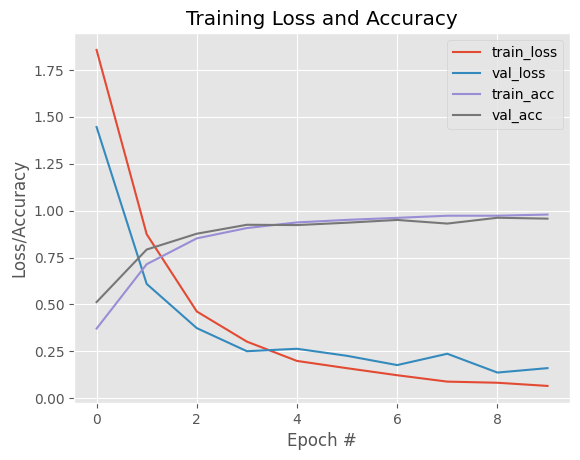

In [ ]:
# Evaluación + Testeo

# Funciones base

def visualize_learning_curve(H):
  epochs = H.history["loss"]
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, len(epochs)), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, len(epochs)), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, len(epochs)), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, len(epochs)), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

from sklearn.metrics import classification_report

# Learning curves
visualize_learning_curve(H)

Podemos ver que la curva de train loss disminuye más que la curva de validation loss. Esto puede estar indicándonos que hay un cierto over-fitting. En general, también la precisión con los datos de training es mayor a la que se obtiene con validación.

Cabe recordar que para esta red, más pequeña y from scracth, hemos redimensionado las imágenes a 64x64, lo que provoca una pérdida de detalle.

### 3.4. Evaluación
- Evaluación del modelo predictivo

In [ ]:
def evaluate_model(model, x, y):
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(x, batch_size=128)
  print(classification_report(y, predictions.argmax(axis=1), target_names=lb.classes_))

# Evaluando el modelo de predicción con las imágenes de test
y_test_labels = np.argmax(y_test_ohe, axis=1) # Convertir etiquetas de one-hot-encoding a su clase original
evaluate_model(convnet, X_test_n, y_test_labels)

#Almacenamos el modelo
convnet.save(BASE_FOLDER +'convnet_without_regularization.h5')

[INFO]: Evaluando red neuronal...
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


              precision    recall  f1-score   support

        Bean       0.95      0.95      0.95       200
Bitter_Gourd       0.95      0.95      0.95       200
Bottle_Gourd       0.97      0.95      0.96       200
     Brinjal       0.93      0.96      0.95       200
    Broccoli       0.97      0.94      0.96       200
     Cabbage       0.96      0.92      0.94       200
    Capsicum       0.97      0.99      0.98       200
      Carrot       0.99      1.00      1.00       200
 Cauliflower       0.97      0.94      0.95       200
    Cucumber       0.96      0.95      0.96       200
      Papaya       0.92      0.98      0.95       200
      Potato       0.95      1.00      0.97       200
     Pumpkin       0.96      0.94      0.95       200
      Radish       0.98      0.93      0.95       200
      Tomato       0.93      0.94      0.93       200

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96   

Podemos observar que la precisión no es la misma para todas las clases. El bottle_gourd se distingue perfectamente mientras que el "cabbage" es la verdura para la que menos precisión se tiene.

### 3.5. Optimización del modelo
- Mejora del modelo usando técnicas de regularización.

Hemos visto que el modelo muestra un cierto overfitting. Vamos a intentar paliarlo utilizando técnicas de regularización como son:

-**Weight regularization**: Consiste en añadir un término extra a la función de pérdida que penaliza pesos demasiado grandes, evitando que la red dependa excesivamente de conexiones específicas (evita que algunos pesos dominen), lo que mejora la capacidad de generalizar en datos no vistos.

-**Dropout**: Durante el entrenamiento, "apaga" aleatoriamente un porcentaje de neuronas en una capa, evitando que el modelo dependa demasiado de ciertas neuronas.

-**Batch Normalization**: Normaliza las activaciones de una capa para que tengan media 0 y varianza 1, dentro de cada batch.

-**Data augmentation**: Consiste en generar versiones artificialmente variadas de las imágenes del dataset de entrenamiento aplicando transformaciones. Enseña a la red a ser invariante a pequeñas modificaciones en las imágenes, lo cual mejora mucho la generalización.

In [ ]:
# Para el Data Augmentation usamos el ImageDataGenerator.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Instanciamos el objeto ImageDataGenerator. Este modificará las imágenes de test. No usamos el rescale porque ya se ha hecho la normalización.
datagen = ImageDataGenerator(
    rotation_range = 5,
    width_shift_range = 0.05,
    height_shift_range = 0.05,
    horizontal_flip = True,
    zoom_range = 0.02
)

# Se ha comprobado a través de varias pruebas que unos cambios mayores dificultaban el entrenamiento (training accuracy oscilaba mucho) y disminuían el rendimiento del modelo.
# Con estos cambios ligeros conseguimos disminuir el overfitting pero sin afectar a la precisión del modelo.

-Creamos la topología de la red.

In [ ]:
# Esta vez vamos a hacer la misma red pero con otra Arquitectura de red - modo API Functional
# La arquitectura va a ser similar a la de antes, simplemente añadiendo las distintas técnicas de regularización.
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras import layers

#Aquí definimos la regularización, que se pasa luego a las capas en el parámetro kernel_regularizer.
regularizer = regularizers.l2(0.0001)  # λ = 0.0001


#Capa de entrada
input = layers.Input(shape=(64,64,3))

# 1.BASE MODEL

# BM Bloque 1.
x1 = layers.Conv2D(32, (3,3), padding = "same", activation = "relu", kernel_regularizer=regularizer)(input) # Nos devuelve un mapa de activación
x1 = layers.BatchNormalization()(x1) #Aquí aplicamos el batch normalization
x1 = layers.Dropout(0.1)(x1)  #El dropout siempre después del Batch Normalization
x1 = layers.Conv2D(32, (3,3), padding = "same", activation = "relu", kernel_regularizer=regularizer)(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Dropout(0.1)(x1)
x1 = layers.MaxPooling2D((2,2))(x1)

# BM Bloque 2
x2 = layers.Conv2D(64, (3,3), padding = "same", activation = "relu", kernel_regularizer=regularizer)(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Dropout(0.1)(x2)
x2 = layers.Conv2D(64, (3,3), padding = "same", activation = "relu", kernel_regularizer=regularizer)(x2)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Dropout(0.1)(x2)
x2 = layers.MaxPooling2D((2,2))(x2)

# BM Bloque 3
x3 = layers.Conv2D(64, (3,3), padding = "same", activation = "relu", kernel_regularizer=regularizer)(x2) #Probamos a introducir más filtros esta vez, para ver si mejora el resultado obtenido anteriormente.
x3 = layers.BatchNormalization()(x3)
x3 = layers.Dropout(0.1)(x3)
x3 = layers.Conv2D(64, (3,3), padding = "same", activation = "relu", kernel_regularizer=regularizer)(x3)
x3 = layers.BatchNormalization()(x3)
x3 = layers.Dropout(0.1)(x3)
x3 = layers.MaxPooling2D((2,2))(x3)


# TOP MODEL V1
#GlobalAveragePooling2D para reducir el numero de parametros
# xfc = layers.GlobalAveragePooling2D()(x3)
# xfc = layers.Dropout(0.3)(xfc)
# predictions = layers.Dense(y_train_ohe.shape[1], activation = "softmax")(xfc)
xfc = layers.Flatten()(x3)
xfc = layers.Dense(64, activation='relu')(xfc)
xfc = layers.Dropout(0.2)(xfc)
predictions = layers.Dense(y_train_ohe.shape[1], activation='softmax')(xfc)

# 3. Unimos las entradas y salidas del modelo
convnet_reg = Model(inputs = input, outputs = predictions)
convnet_reg.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 8, 8, 64)       │             

 Total params: 403,887 (1.54 MB)

 Trainable params: 403,247 (1.54 MB)

 Non-trainable params: 640 (2.50 KB)

- Compilación y entrenamiento

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
# Compilamos el modelo y entrenamos
convnet_reg.compile(optimizer=Adam(learning_rate=1e-4), loss = "categorical_crossentropy", metrics = ["accuracy"])

# Entrenamos el perceptrón multicapa
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True) #Hay mucha oscilación (por lo que elegimos un patience alto) y eso podemos mejorarlo usando Early Stop que permite detener el entrenamiento del modelo cuando el rendimiento en un conjunto de datos de validación deja de mejorar o empieza a empeorar

H_reg = convnet_reg.fit(datagen.flow(X_train_n, y_train_ohe, batch_size = 16),  # Aquí es donde aplicamos el Data Augmentation. Bajamos el batch size ya que no es un modelo pesado (imagenes 64x64)
                epochs = 50,  # Aumentamos las épocas cuando se usa data agumentation y regularizacion.
                steps_per_epoch = X_train_n.shape[0] // 16,
                validation_data = (X_train_val_n, y_train_val_ohe),
                #callbacks=[early_stop]
                )


Epoch 1/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.2909 - loss: 2.2166 - val_accuracy: 0.6357 - val_loss: 1.1664
Epoch 2/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.5625 - loss: 1.7486 - val_accuracy: 0.6347 - val_loss: 1.1696
Epoch 3/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.6608 - loss: 1.0674 - val_accuracy: 0.7510 - val_loss: 0.8554
Epoch 4/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.7500 - loss: 0.8107 - val_accuracy: 0.7510 - val_loss: 0.8528
Epoch 5/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.7629 - loss: 0.7556 - val_accuracy: 0.8113 - val_loss: 0.6665
Epoch 6/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.6875 - loss: 0.9405 - val_accuracy: 0.8097 - val_loss: 0.6616
Epoch 7/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.8253 - loss: 0.5826 - val_accuracy: 0.8577 - val_loss: 0.4942
Epoch 8/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.8750 - loss: 0.3477 - 

- Validación y test

[INFO]: Evaluando red neuronal...
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


              precision    recall  f1-score   support

        Bean       0.96      0.98      0.97       200
Bitter_Gourd       0.99      0.96      0.98       200
Bottle_Gourd       1.00      0.97      0.99       200
     Brinjal       0.98      0.88      0.93       200
    Broccoli       0.96      0.99      0.98       200
     Cabbage       0.93      0.97      0.95       200
    Capsicum       0.99      0.97      0.98       200
      Carrot       0.92      1.00      0.96       200
 Cauliflower       0.98      0.98      0.98       200
    Cucumber       1.00      0.97      0.98       200
      Papaya       0.96      1.00      0.98       200
      Potato       0.96      0.98      0.97       200
     Pumpkin       0.96      0.96      0.96       200
      Radish       1.00      0.97      0.99       200
      Tomato       0.96      0.94      0.95       200

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97   

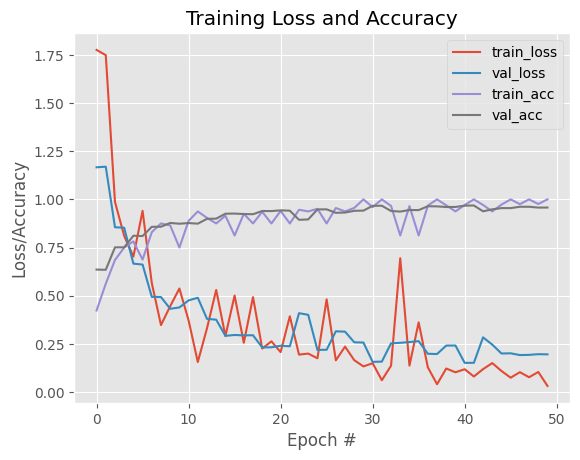

In [ ]:
def evaluate_model(model, x, y):
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(x, batch_size=16)
  print(classification_report(y, predictions.argmax(axis=1), target_names=lb.classes_))

# Learning curves
visualize_learning_curve(H_reg)
# Evaluando el modelo de predicción con las imágenes de test
y_test_labels = np.argmax(y_test_ohe, axis=1) # Convertir etiquetas de one-hot-encoding a su clase original
evaluate_model(convnet_reg, X_test_n, y_test_labels)
convnet_reg.save(BASE_FOLDER +'convnet_with_regularization.h5')

Cabe destacar que para entrenar este modelo se hicieron varias pruebas combinando los hiperparámetros de distintas formas.
Se ha concluido que un batch size menor ofrecía resultados mucho mejores, y el tiempo de entrenamiento seguía siendo bastante razonable. Además, se probó a utilizar GlobalAveragePooling2D en la capa del Top Model pero el resultado empeoraba respecto al obtenido usando una capa Flatten+Dense. También se probó a aumentar los filtros de la tercera capa a 256 y aumentar el batch size pero el resultado no fue mejor que el obtenido con este modelo.

En la gráfica observamos que el train accuracy oscila un poco mientras que el validation accuracy se mantiene mucho más estable, lo que podría ser causado por las modificaciones introducidas por el ImageGenerator, que solo se aplica en los datos de train, dificultando ligeramente el aprendizaje, pero permitiendo generalizar mejor (lo que se traduce en menor error de validación). Unas transformaciones más agresivas parecían empeorar un poco el training loss.


Finalmente, se comprueba que tenemos una buena precisión en general, de un 97%, a pesar de haber reducido las imágenes a 64x64, lo que nos permite entrenar el modelo bastante rápido. Con un learning rate menor, se obtenían menos oscilaciones en el training loss, pero también se requería aumentar el número de épocas, y el accuracy final no era mucho mejor.

## 4. <a name="transfer">Estrategia 2: Transfer Learning</a>

### 4.1. Red Preentrenada 1: VGGs

La primera red preentrenada que se utilizará será la "VGG16". Esta red está compuesta por 13 capas convolucionales y 3 capas densas (completamente conectadas) para finalizar.

Las capas se organizan en 5 bloques. Los 2 primeros bloques están compuestos por dos capas convolucionales y una capa de MaxPooling de la siguiente forma:

- Conv2D(a, 3x3, relu)
- Conv2D(a, 3x3, relu)
- MaxPooling2D(2x2)

Los otros tres bloques incluyen una capa convolucional más de la siguiente forma:

- Conv2D(a, 3x3, relu)
- Conv2D(a, 3x3, relu)
- Conv2D(a, 3x3, relu)
- MaxPooling2D(2x2)

La a sería el número de filtros para cada capa siendo respectivamente: 64, 128, 256, 512 y 512, por cada bloque.

Por último el bloque final de clasificación tendría la siguiente forma:

- Flatten
- Dense(4096, activation='relu')
- Dense(4096, activation='relu')
- Dense(1000, activation='softmax')

El modelo original en la última capa presentaría 1000 clases (ImageNet), sin embargo, al presentar nuestro dataset 15 clases la última capa será deberá utilzar este número como se ve en la implementación en los siguientes apartados.

### 4.1.1. Acondicionamiento y Preprocesamiento de los Datos

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

In [ ]:
# Generador con aumentos para entrenamiento
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)

# Generadores sin aumento para validación y prueba
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Creamos los generadores
train_data = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed = 42
)

val_data = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed = 42
)

test_data = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed = 42
)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


### 4.1.2 Cargar modelo base preentrenado y construir el modelo completo

In [ ]:
# Imports necesarios
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

In [ ]:
# Cargar base VGG16 sin la parte superior
VGG16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelamos las capas del modelo base (fase de Transfer Learning)
VGG16_model.trainable = False

# Añadimos capas superiores
x = VGG16_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.1)(x)
output = Dense(len(CLASSES), activation='softmax', kernel_regularizer=l2(0.01))(x)

# Creamos el modelo completo
VGG16_transfer_model = Model(inputs=VGG16_model.input, outputs=output)

# Compilamos
VGG16_transfer_model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

VGG16_transfer_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             

 Total params: 14,784,335 (56.40 MB)

 Trainable params: 68,623 (268.06 KB)

 Non-trainable params: 14,715,712 (56.14 MB)

### 4.1.3 Transfer Learning (Fase inicial de entrenamiento)

In [ ]:
VGG16_initial_history = VGG16_transfer_model.fit(train_data, epochs=15, validation_data=val_data) # Recomendación de hacer entre 5 y 20 epochs

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 260s 507ms/step - accuracy: 0.0842 - loss: 5.6012 - val_accuracy: 0.1840 - val_loss: 4.8332
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 224s 477ms/step - accuracy: 0.2189 - loss: 4.7744 - val_accuracy: 0.4237 - val_loss: 4.0983
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 224s 477ms/step - accuracy: 0.3940 - loss: 4.1940 - val_accuracy: 0.6383 - val_loss: 3.5991
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 230s 490ms/step - accuracy: 0.5443 - loss: 3.7803 - val_accuracy: 0.7657 - val_loss: 3.2524
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 224s 477ms/step - accuracy: 0.6486 - loss: 3.4686 - val_accuracy: 0.8347 - val_loss: 3.0076
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 265s 484ms/step - accuracy: 0.7263 - loss: 3.2328 - val_accuracy: 0.8713 - val_loss: 2.8265
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 221s 471ms/step - accuracy: 0.7860 - loss: 3.0280 - val_accuracy: 0.8947 - val_loss: 2.6862
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 224s 478ms/step - accuracy: 0.8119 -

In [ ]:
def evaluate_model(model, test_data):
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(test_data, batch_size=128)
  y_true = test_data.classes
  y_pred = np.argmax(predictions, axis=1)
  class_labels = list(test_data.class_indices.keys())
  print(classification_report(y_true, y_pred, target_names=class_labels))

In [ ]:
# Learning curves
visualize_learning_curve(VGG16_initial_history)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(VGG16_transfer_model, test_data)

VGG16_transfer_model.save(BASE_FOLDER +'VGG16_transfer_model.h5')

[INFO]: Evaluando red neuronal...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step


              precision    recall  f1-score   support

        Bean       0.94      0.98      0.96       200
Bitter_Gourd       0.96      0.93      0.95       200
Bottle_Gourd       0.93      0.98      0.95       200
     Brinjal       0.94      0.92      0.93       200
    Broccoli       0.98      0.97      0.98       200
     Cabbage       0.98      0.99      0.98       200
    Capsicum       0.97      0.96      0.96       200
      Carrot       0.96      0.98      0.97       200
 Cauliflower       0.98      0.96      0.97       200
    Cucumber       0.99      0.90      0.94       200
      Papaya       0.90      0.94      0.92       200
      Potato       0.94      0.97      0.96       200
     Pumpkin       0.92      0.95      0.94       200
      Radish       0.99      0.95      0.97       200
      Tomato       0.97      0.94      0.96       200

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96   

### 4.1.4 Fine-Tuning (Descongelar VGG16 para seguir entrenando)

In [ ]:
VGG16_transfer_model.trainable = True
fine_tune_at = 10  # Número de capas a descongelar para VGG que tiene pocas capas descongelamos hasta el bloque 5

for layer in VGG16_transfer_model.layers[:fine_tune_at]:
    layer.trainable = False

VGG16_transfer_model.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
VGG16_transfer_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             

 Total params: 14,784,335 (56.40 MB)

 Trainable params: 68,623 (268.06 KB)

 Non-trainable params: 14,715,712 (56.14 MB)

In [ ]:
VGG16_finetune_history = VGG16_transfer_model.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True), ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)]
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 253s 530ms/step - accuracy: 0.9210 - loss: 2.2175 - val_accuracy: 0.9587 - val_loss: 2.0707 - learning_rate: 1.0000e-06
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 243s 517ms/step - accuracy: 0.9251 - loss: 2.2062 - val_accuracy: 0.9617 - val_loss: 2.0651 - learning_rate: 1.0000e-06
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 243s 519ms/step - accuracy: 0.9236 - loss: 2.2112 - val_accuracy: 0.9600 - val_loss: 2.0580 - learning_rate: 1.0000e-06
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 239s 509ms/step - accuracy: 0.9269 - loss: 2.1937 - val_accuracy: 0.9603 - val_loss: 2.0522 - learning_rate: 1.0000e-06
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 242s 516ms/step - accuracy: 0.9271 - loss: 2.1887 - val_accuracy: 0.9617 - val_loss: 2.0466 - learning_rate: 1.0000e-06
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 240s 511ms/step - accuracy: 0.9208 - loss: 2.1994 - val_accuracy: 0.9607 - val_loss: 2.0396 - learning_rate: 1.0000e-06
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 

[INFO]: Evaluando red neuronal...
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step


              precision    recall  f1-score   support

        Bean       0.94      0.98      0.96       200
Bitter_Gourd       0.97      0.94      0.96       200
Bottle_Gourd       0.93      0.98      0.96       200
     Brinjal       0.94      0.92      0.93       200
    Broccoli       0.98      0.97      0.98       200
     Cabbage       0.98      0.99      0.99       200
    Capsicum       0.97      0.96      0.96       200
      Carrot       0.97      0.98      0.98       200
 Cauliflower       0.98      0.96      0.97       200
    Cucumber       0.99      0.91      0.95       200
      Papaya       0.89      0.94      0.91       200
      Potato       0.96      0.98      0.97       200
     Pumpkin       0.95      0.96      0.95       200
      Radish       0.99      0.96      0.98       200
      Tomato       0.97      0.95      0.96       200

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96   

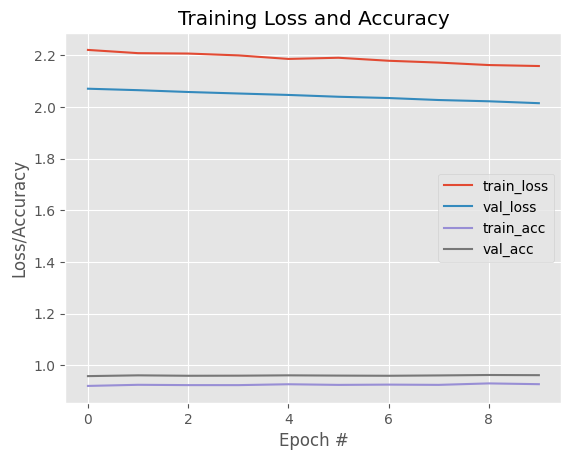

In [ ]:
# Learning curves
visualize_learning_curve(VGG16_finetune_history)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(VGG16_transfer_model, test_data)

VGG16_transfer_model.save(BASE_FOLDER +'VGG16_fine_tuning_model.h5')

### 4.2. Red Preentrenada 2: EfficientNetB0

La segunda red preentrenada será EfficientNetB0. Este es el modelo más básico de la familia EfficientNet, que destacan por ofrecer buena relación entre eficiencia y precisión.

Esta red se diferencia de arquitecturas más tradicionales como la primera usada (VGG16) al utilizar técnicas modernas. Se utilizan bloques MBConv, swish como función de activación y se ajsuta de manera uniforme la resolución y dimensiones del modelo (anchura y profundidad) a través de un escalado compuesto.

La arquitectura se basa en una secuencia de bloques MBConv que se ejecutan un número diferente de repeticiones, con diferentes tamaños de kernel y filtros.

Son 9 capas con filtros 32, 16, 24, 40, 80, 112, 192, 320 y 1280 respectivamente y que se ejecutan 1, 1, 2, 2, 3, 3, 4, 1 y 1 veces.

De la misma forma que para la otra red preentrenada finalmente en la capa de salida habrá que modificar la capa densa, puesto que se encuentra entrenada con el dataset de 1000 clases de ImageNet.



### 4.2.1. Acondicionamiento y Preprocesamiento de los Datos

In [ ]:
# Se utilizan los conjuntos preparados para la primera red preentrenada

### 4.2.2. Cargar modelo base preentrenado y construir el modelo completo

In [ ]:
# Imports necesarios
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

In [ ]:
# Cargar base EfficientNetB0 sin la parte superior
EfficientNetB0_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelamos las capas del modelo base (fase de Transfer Learning)
EfficientNetB0_model.trainable = False

# Añadimos capas superiores
x = EfficientNetB0_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.1)(x)
output = Dense(len(CLASSES), activation='softmax', kernel_regularizer=l2(0.01))(x)

# Creamos el modelo completo
efficientnet_transfer_model = Model(inputs=EfficientNetB0_model.input, outputs=output)

# Compilamos
efficientnet_transfer_model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

efficientnet_transfer_model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,220,594 (16.10 MB)

 Trainable params: 168,463 (658.06 KB)

 Non-trainable params: 4,052,131 (15.46 MB)

### 4.2.3. Transfer Learning (Fase inicial de entrenamiento)

In [ ]:
efficientnetb0_initial_history = efficientnet_transfer_model.fit(train_data, epochs=15, validation_data=val_data)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 231s 443ms/step - accuracy: 0.2171 - loss: 5.1934 - val_accuracy: 0.7103 - val_loss: 3.7466
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 187s 399ms/step - accuracy: 0.6706 - loss: 3.7522 - val_accuracy: 0.9123 - val_loss: 3.0548
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 211s 418ms/step - accuracy: 0.8502 - loss: 3.1764 - val_accuracy: 0.9533 - val_loss: 2.7816
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 192s 409ms/step - accuracy: 0.9132 - loss: 2.9092 - val_accuracy: 0.9687 - val_loss: 2.6383
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 406ms/step - accuracy: 0.9431 - loss: 2.7429 - val_accuracy: 0.9777 - val_loss: 2.5347
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 405ms/step - accuracy: 0.9536 - loss: 2.6249 - val_accuracy: 0.9837 - val_loss: 2.4488
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 190s 405ms/step - accuracy: 0.9617 - loss: 2.5252 - val_accuracy: 0.9870 - val_loss: 2.3658
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 407ms/step - accuracy: 0.9648 -

[INFO]: Evaluando red neuronal...
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step


              precision    recall  f1-score   support

        Bean       0.99      1.00      1.00       200
Bitter_Gourd       1.00      0.99      1.00       200
Bottle_Gourd       0.99      0.98      0.99       200
     Brinjal       1.00      1.00      1.00       200
    Broccoli       1.00      0.99      0.99       200
     Cabbage       1.00      0.99      1.00       200
    Capsicum       1.00      1.00      1.00       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       0.99      0.99      0.99       200
    Cucumber       0.98      0.97      0.98       200
      Papaya       0.97      1.00      0.98       200
      Potato       1.00      1.00      1.00       200
     Pumpkin       1.00      0.99      1.00       200
      Radish       1.00      1.00      1.00       200
      Tomato       1.00      1.00      1.00       200

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99   

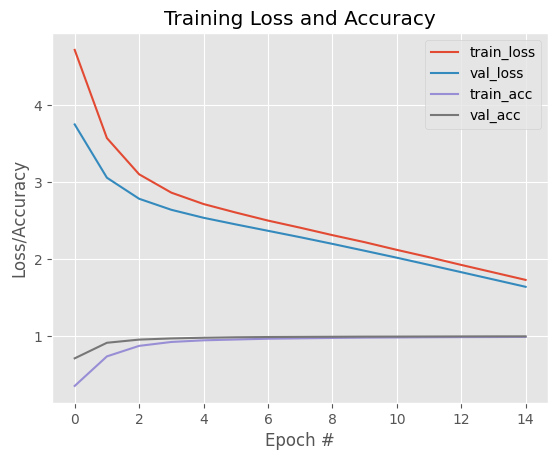

In [ ]:
# Learning curves
visualize_learning_curve(efficientnetb0_initial_history)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(efficientnet_transfer_model, test_data)

#Guardamos el modelo
efficientnet_transfer_model.save(BASE_FOLDER +'efficientnet_transfer_model.h5')

### 4.2.4. Fine-Tuning (Descongelar EfficientNet para seguir entrenando)

In [ ]:
efficientnet_transfer_model.trainable = True
fine_tune_at = 20  # Número de capas a descongelar

for layer in efficientnet_transfer_model.layers[:fine_tune_at]:
    layer.trainable = False

efficientnet_transfer_model.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
efficientnet_transfer_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,220,594 (16.10 MB)

 Trainable params: 168,463 (658.06 KB)

 Non-trainable params: 4,052,131 (15.46 MB)

In [ ]:
efficientnetb0_finetune_history = efficientnet_transfer_model.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True), ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)]
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 248s 474ms/step - accuracy: 0.9873 - loss: 1.6793 - val_accuracy: 0.9960 - val_loss: 1.6277 - learning_rate: 1.0000e-06
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 189s 403ms/step - accuracy: 0.9885 - loss: 1.6648 - val_accuracy: 0.9960 - val_loss: 1.6161 - learning_rate: 1.0000e-06
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 185s 395ms/step - accuracy: 0.9885 - loss: 1.6540 - val_accuracy: 0.9960 - val_loss: 1.6056 - learning_rate: 1.0000e-06
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 205s 401ms/step - accuracy: 0.9883 - loss: 1.6415 - val_accuracy: 0.9957 - val_loss: 1.5953 - learning_rate: 1.0000e-06
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 190s 405ms/step - accuracy: 0.9897 - loss: 1.6293 - val_accuracy: 0.9957 - val_loss: 1.5847 - learning_rate: 1.0000e-06
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 189s 402ms/step - accuracy: 0.9886 - loss: 1.6188 - val_accuracy: 0.9957 - val_loss: 1.5736 - learning_rate: 1.0000e-06
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 

[INFO]: Evaluando red neuronal...
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step


              precision    recall  f1-score   support

        Bean       0.99      1.00      1.00       200
Bitter_Gourd       1.00      0.99      1.00       200
Bottle_Gourd       0.99      0.98      0.99       200
     Brinjal       1.00      1.00      1.00       200
    Broccoli       1.00      0.99      0.99       200
     Cabbage       1.00      0.99      1.00       200
    Capsicum       1.00      1.00      1.00       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       0.99      0.99      0.99       200
    Cucumber       0.99      0.97      0.98       200
      Papaya       0.97      1.00      0.98       200
      Potato       1.00      1.00      1.00       200
     Pumpkin       1.00      0.99      1.00       200
      Radish       1.00      1.00      1.00       200
      Tomato       1.00      1.00      1.00       200

    accuracy                           0.99      3000
   macro avg       1.00      0.99      1.00      3000
weighted avg       1.00   

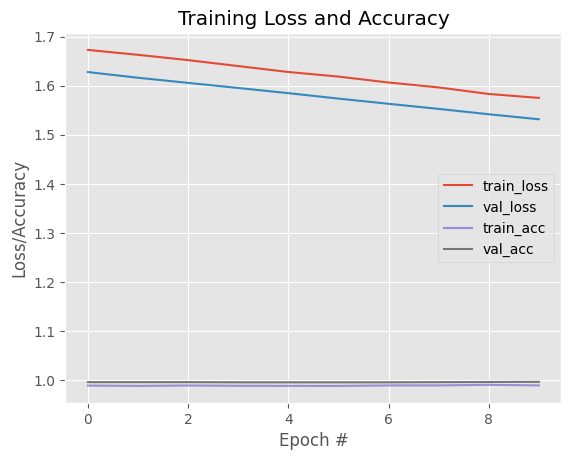

In [ ]:
# Learning curves
visualize_learning_curve(efficientnetb0_finetune_history)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(efficientnet_transfer_model, test_data)

# Guardamos el modelo
efficientnet_transfer_model.save(BASE_FOLDER +'efficientnet_transfer_model_fine_tunning.h5')

## 5.  <a name="comparativa">Comparación de Estrategias</a>
- Comparación de métricas, tablas y análisis crítico.

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('convnet_without_regularization.h5')
model2 = load_model('convnet_with_regularization.h5')
model3 = load_model('VGG16_transfer_model.h5')
model4 = load_model('VGG16_fine_tuning_model.h5')
model5 = load_model('efficientnet_transfer_model.h5')
model6 = load_model('efficientnet_fine_tunning.h5')

In [ ]:
import time

# Función para evaluar modelos con arrays (CNN desde cero)
def evaluar_con_numpy(modelo, X_test, y_true):
    start = time.time()
    y_pred = modelo.predict(X_test)
    end = time.time()
    tiempo_prediccion = end - start

    y_pred_classes = np.argmax(y_pred, axis=1)
    report = classification_report(y_true, y_pred_classes, output_dict=True, zero_division=0)
    return {
        "accuracy": report["accuracy"],
        "precision (macro avg)": report["macro avg"]["precision"],
        "recall (macro avg)": report["macro avg"]["recall"],
        "f1-score (macro avg)": report["macro avg"]["f1-score"],
        "tiempo_prediccion(s)": tiempo_prediccion
    }

# Función para evaluar modelos con generator (Transfer learning)
def evaluar_con_generator(modelo, test_generator):
    start = time.time()
    y_pred = modelo.predict(test_generator)
    end = time.time()
    tiempo_prediccion = end - start

    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_generator.classes
    report = classification_report(y_true, y_pred_classes, output_dict=True, zero_division=0)
    return {
        "accuracy": report["accuracy"],
        "precision (macro avg)": report["macro avg"]["precision"],
        "recall (macro avg)": report["macro avg"]["recall"],
        "f1-score (macro avg)": report["macro avg"]["f1-score"],
        "tiempo_prediccion(s)": tiempo_prediccion
    }

# Evaluación de todos los modelos con tiempo incluido
resultados = []

# Modelos CNN desde cero
resultados.append({
    **evaluar_con_numpy(model1, X_test_n, y_test_labels),
    "Modelo": "CNN sin regularización"
})
resultados.append({
    **evaluar_con_numpy(model2, X_test_n, y_test_labels),
    "Modelo": "CNN con regularización"
})

# Modelos Transfer Learning
resultados.append({
    **evaluar_con_generator(model3, test_data),
    "Modelo": "VGG16 Transfer"
})
resultados.append({
    **evaluar_con_generator(model4, test_data),
    "Modelo": "VGG16 Fine Tuning"
})
resultados.append({
    **evaluar_con_generator(model5, test_data),
    "Modelo": "EfficientNet Transfer"
})
resultados.append({
    **evaluar_con_generator(model6, test_data),
    "Modelo": "EfficientNet Fine Tuning"
})

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step


In [ ]:
# Crear y mostrar tabla
df_resultados = pd.DataFrame(resultados).set_index("Modelo")
display(df_resultados.round(4))

accuracy  precision (macro avg)  recall (macro avg)  \
Modelo                                                                          
CNN sin regularización      0.9573                 0.9577              0.9573   
CNN con regularización      0.9707                 0.9715              0.9707   
VGG16 Transfer              0.9560                 0.9567              0.9560   
VGG16 Fine Tuning           0.9603                 0.9610              0.9603   
EfficientNet Transfer       0.9947                 0.9947              0.9947   
EfficientNet Fine Tuning    0.9950                 0.9951              0.9950   

                          f1-score (macro avg)  tiempo_prediccion(s)  
Modelo                                                                
CNN sin regularización                  0.9573                0.7887  
CNN con regularización                  0.9706                0.9620  
VGG16 Transfer                          0.9560               14.9464  
VGG16 Fine Tuning                       0.9604               20.6184  
EfficientNet Transfer                   0.9947                5.2147  
EfficientNet Fine Tuning                0.9950                5.7832

###**Comparación de métricas**
Al analizar en detalle las métricas obtenidas, destacan varios puntos:

* **CNN sin regularización**: Logró métricas bastante equilibradas (accuracy, precision, recall y f1-score alrededor de 0.957), aunque mostró cierta limitación debido al sobreajuste. Su ventaja más destacable es la rápida predicción (0.79 segundos).

* **CNN con regularización**: Presentó mejoras notables respecto al modelo sin regularización, alcanzando aproximadamente 0.970 en todas las métricas evaluadas, lo que demuestra claramente el beneficio de las técnicas implementadas. Su tiempo de inferencia (0.96 segundos) continúa siendo extremadamente eficiente.

* **VGG16 Transfer**: Mostró métricas ligeramente inferiores (alrededor de 0.956) a la CNN regularizada. Además, su tiempo de predicción es significativamente mayor (14.95 segundos), siendo éste su principal inconveniente.

* **VGG16 Fine-tuning**: Presentó un ligero aumento en rendimiento (alrededor de 0.960) respecto al VGG16 congelado, aunque aún por debajo de la CNN regularizada, con una inferencia aún más lenta (20.62 segundos). Esto resalta que el esfuerzo extra en fine-tuning no aportó mejoras sustanciales en términos de precisión.

* **EfficientNet Transfer**: Se posicionó muy por encima de las demás estrategias con métricas cercanas al máximo (0.9947 en todas las medidas), mostrando una excelente generalización. Aunque menos eficiente que las CNN pequeñas, logró una velocidad razonable (5.21 segundos).

* **EfficientNet Fine-tuning**: Confirmó aún más su superioridad, con un mínimo aumento adicional hasta alcanzar métricas de 0.9950, consolidando su posición como el modelo con mejor rendimiento global. La inferencia aumentó ligeramente (5.78 segundos), permaneciendo aceptable para muchos escenarios prácticos.


### **Análisis crítico**

La comparación entre las distintas estrategias muestra claramente que no existe un enfoque único y universal para todos los escenarios, sino que cada uno tiene ventajas y limitaciones muy concretas.

La CNN entrenada desde cero resultó sorprendentemente eficaz cuando se aplicaron correctamente técnicas de regularización, logrando buena precisión (97.07%) con una velocidad de inferencia excelente. Sin embargo, esta estrategia implica bastante esfuerzo en optimización manual, especialmente en hiperparámetros y técnicas para prevenir el sobreajuste, y su éxito depende directamente del tamaño y calidad del conjunto de datos.

Por otro lado, aunque VGG16 es conocido por su potencia, sus resultados fueron ligeramente decepcionantes en nuestro contexto. Apenas mejoró respecto a la CNN simple, y lo hizo a costa de un incremento muy significativo en tiempo y recursos computacionales. Esto indica que un modelo clásico preentrenado no siempre garantiza mejores resultados, especialmente si se compara contra un modelo personalizado y bien regularizado.

EfficientNet marcó una clara diferencia en rendimiento, alcanzando métricas sobresalientes con poco esfuerzo extra. Este modelo demostró la importancia de escoger redes preentrenadas modernas que logran combinar alta precisión (alrededor del 99.5%) con un coste computacional relativamente bajo. Su desempeño fue superior en prácticamente todos los sentidos, ofreciendo una solución ideal si el objetivo principal es maximizar precisión y calidad de resultados, siempre que el entorno permita asumir tiempos de predicción ligeramente mayores que una CNN sencilla.

En definitiva, si se busca equilibrio entre simplicidad y velocidad, entrenar una CNN desde cero sigue siendo válido, pero cuando la prioridad absoluta es obtener resultados cercanos a la perfección, EfficientNet resulta claramente la mejor opción. La elección final debería basarse en las condiciones reales de implementación, considerando tanto la precisión deseada como los recursos disponibles.
